<a href="https://colab.research.google.com/github/Omars2003/Robotics/blob/Robotics/IAM3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔵 Introduccion  🌵

1.-Repaso de programación.

2.-Programación AI

3.- Programacion para el proyecto

In [ ]:
print("-----------------------------------")
print("Starbucks")
print("-----------------------------------")

tamaño = input("ELige el tamaño de tu bebida ? S, M o G ") #variable que guarda el tamaño de tu bebida se ocupa la funcion input()
extra_leche = input("quieres leche exta? S o N ")
pan = input("quieres un pan? S o N ")
precio = 0 #contador que empieza con el valor de 0 que almacena el precio de tu pedido 

#Seleccionando tamaño  #ocupamos un condicional if con multiples opciones
if tamaño == "S":
    precio = 40
elif tamaño == "M":
    precio =  50
elif tamaño == "G":
    precio  = 60

#aagregando leche extra
if tamaño == "S" and extra_leche == "S":
    precio += 2
elif tamaño == "M" or "L" and extra_leche == "S":
    precio += 3

#agregando el pan
if pan == "S":
    precio += 1

print(f"Tu cuenta total es: ${precio}.")

# AI programación ⏰

In [ ]:
!pip install tensorflow
!pip install kaggle

Un framework es un conjunto de herramientas, bibliotecas y componentes predefinidos que proporcionan una estructura y funcionalidades para desarrollar aplicaciones de software.

Dependiendo lo que quieras hacer es la framework que utlizas.

en este ejemplo  instalamos tensorflow que es un framework que tiene bibliotecas de inteligencia artifial que utlizaremos para nuestro desarrollo,por otro lado tambien instalamos kaggle que es una pagina para data sscientist y contiene data sets,para utlizar las funciones de ambas librerias las tuvimos que instalar primero.

In [ ]:
from google.colab import files #de las librerias importamos a nuestro codigo la funcion de files

uploaded = files.upload() #puedes subir archivos 

In [ ]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = '/content' # al importar las credenciales de kaggle les damos un lugar en nuestro archivo donde se guarden

In [ ]:
 #al tener ya instalada cualquier libreria podemos usar ya sus funciones
import tensorflow as tf  #Creación y entrenamiento de modelos de aprendizaje automático: 
import os #nos proporciona funciones para trabajar con rutas de archivo y directorio, como unir rutas, obtener nombres de archivo, comprobar la existencia de archivos/directorios, crear directorios, cambiar el directorio de trabajo, etc.
import kaggle #Descarga de conjuntos de datos de Kaggle: La biblioteca kaggle



In [ ]:

from google.colab import files

# Crea un directorio para almacenar las credenciales de Kaggle
os.makedirs('/content', exist_ok=True)

# Sube el archivo JSON de las credenciales
uploaded = files.upload()

# Mueve el archivo JSON al directorio adecuado
os.rename(list(uploaded.keys())[0], '/content/kaggle.json')

# Establece los permisos correctos para el archivo JSON
os.chmod('/content/kaggle.json', 600)

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d samuelcortinhas/cats-and-dogs-image-classification
#aqui descargamos la dataset que vamos a usar para nuestro entrenamiento
#tambien podemos crear nuestras propias datasets


https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification

In [ ]:
!unzip cats-and-dogs-image-classification.zip
#lo unzipamos 

In [ ]:
!ls

 cats-and-dogs-image-classification.zip   kaggle.json   test
'kaggle (1).json'			  sample_data   train


In [ ]:
!pwd

/content


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential



 🥭 ImageDataGenerator (de tensorflow.keras.preprocessing.image):
Esta clase permite generar un flujo de datos de imágenes con diversas transformaciones y aumentos de datos, como rescalado, rotación, zoom, volteo horizontal, etc. Es muy útil para la preparación de conjuntos de datos de imágenes para su uso en modelos de aprendizaje automático.

🥭Conv2D (de tensorflow.keras.layers):
Esta capa representa una convolución 2D en una red neuronal convolucional. La convolución 2D se utiliza para extraer características de las imágenes mediante el deslizamiento de un filtro (kernel) sobre la imagen y realizando operaciones de multiplicación y suma. Es una de las operaciones fundamentales en el procesamiento de imágenes.

🥭MaxPooling2D (de tensorflow.keras.layers):
Esta capa realiza un submuestreo de las características extraídas por las capas de convolución, reduciendo la dimensión espacial de la representación de la imagen. Ayuda a reducir el costo computacional y a extraer las características más importantes.

🥭Flatten (de tensorflow.keras.layers):
Esta capa se utiliza para aplanar los datos de entrada. Transforma una matriz multidimensional en un vector unidimensional, lo cual es necesario antes de conectar una capa densa (totalmente conectada) en la red neuronal.

🥭Dense (de tensorflow.keras.layers):
Esta capa representa una capa densa o totalmente conectada en una red neuronal. Cada neurona de esta capa está conectada a todas las neuronas de la capa anterior y realiza operaciones de multiplicación y suma ponderadas. Es comúnmente utilizada en la etapa final de una red neuronal para realizar la clasificación o la regresión.

🥭Sequential (de tensorflow.keras.models):
Esta clase representa un modelo secuencial de redes neuronales en Keras. Se utiliza para crear modelos de redes neuronales en los que las capas se apilan de forma secuencial, una tras otra. Es una forma sencilla y común de construir modelos en Keras.

In [ ]:

# Directorio en el que se descomprimió el conjunto de datos
directorio_del_conjunto_de_datos = '/content'

# Crear un generador de datos utilizando el conjunto de datos descomprimido
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

# Cargar el conjunto de datos desde el directorio
dataset = data_generator.flow_from_directory(directorio_del_conjunto_de_datos, target_size=(224, 224), batch_size=32, class_mode='binary')

Found 697 images belonging to 4 classes.


In [ ]:
# Obtener las clases encontradas en el conjunto de datos
clases = dataset.class_indices

# Imprimir las clases encontradas
print("Clases encontradas:")
for clase, indice in clases.items():
    print(f"- {clase}: {indice}")

In [ ]:

data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# Creamos un generador de datos de imágenes con las siguientes configuraciones:
# - Rescale: Normalizamos los valores de los píxeles en el rango [0, 1].
# - Validation_split: Separación del conjunto de datos en entrenamiento (80%) y validación (20%).





# Creamos el conjunto de datos de entrenamiento utilizando el generador de datos.
# - directorio_del_conjunto_de_datos: Ruta al directorio que contiene las imágenes clasificadas en subdirectorios.
# - target_size: Tamaño al que se redimensionarán todas las imágenes (224x224 en este caso).
# - batch_size: Número de muestras de imágenes que se generan en cada iteración (32 en este caso).
# - class_mode: Modo de clasificación utilizado (categorical en este caso, para clasificación multiclase).
# - subset: Subconjunto utilizado para entrenamiento (en este caso, se utiliza el subconjunto de entrenamiento).
train_dataset = data_generator.flow_from_directory(directorio_del_conjunto_de_datos, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='training')



# Creamos el conjunto de datos de validación utilizando el generador de datos.
# - directorio_del_conjunto_de_datos: Ruta al directorio que contiene las imágenes clasificadas en subdirectorios.
# - target_size: Tamaño al que se redimensionarán todas las imágenes (224x224 en este caso).
# - batch_size: Número de muestras de imágenes que se generan en cada iteración (32 en este caso).
# - class_mode: Modo de clasificación utilizado (categorical en este caso, para clasificación multiclase).
# - subset: Subconjunto utilizado para validación (en este caso, se utiliza el subconjunto de validación).


validation_dataset = data_generator.flow_from_directory(directorio_del_conjunto_de_datos, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='validation')

In [ ]:
model = Sequential()# Creamos un modelo secuencial, que es una pila lineal de capas.


#Agregamos una capa de convolución con 32 filtros, un tamaño de filtro de 3x3 y la función de activación 'relu'.
# -input_shape: Especificamos la forma de entrada de las imágenes (224x224 píxeles en 3 canales de color).
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
# Agregamos una capa de agrupación máxima (MaxPooling) con un tamaño de ventana de 2x2.
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Aplanamos la salida de las capas anteriores en un vector unidimensional.
model.add(Flatten())

# Agregamos una capa completamente conectada (Dense) con 128 unidades y la función de activación 'relu'.
model.add(Dense(128, activation='relu'))



# Agregamos una capa completamente conectada (Dense) con un número de unidades igual al número de clases en el conjunto de datos de entrenamiento.
# - train_dataset.num_classes: Número de clases en el conjunto de datos de entrenamiento.
# - activation: Utilizamos la función de activación 'softmax' para obtener probabilidades de clasificación para cada clase.
model.add(Dense(train_dataset.num_classes, activation='softmax'))

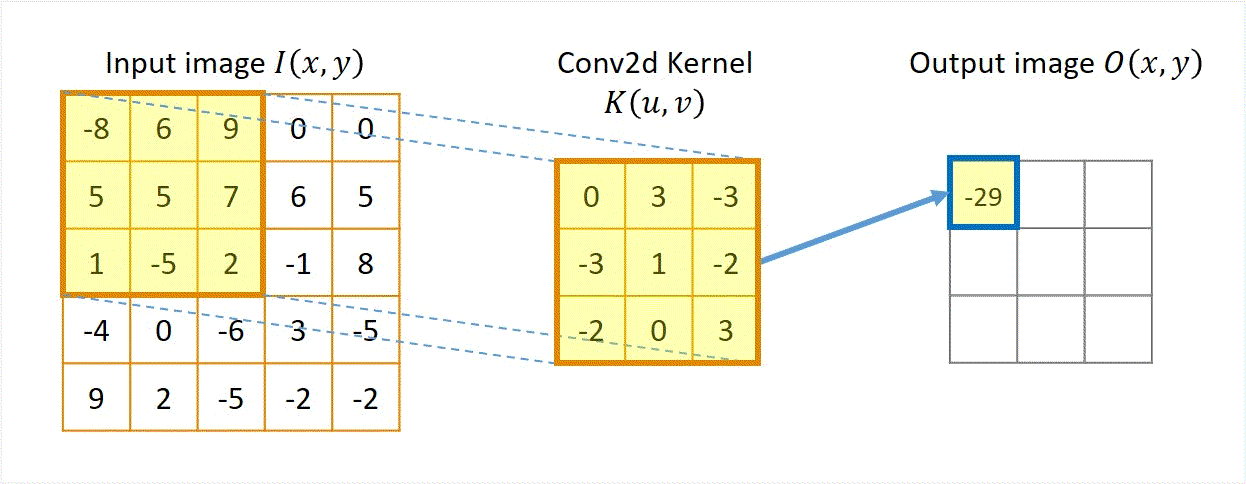

In [ ]:
# Compilar y entrenar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_dataset, validation_data=validation_dataset, epochs=10)

In [ ]:
test_loss, test_accuracy = model.evaluate(validation_dataset)
print('Precisión en el conjunto de datos de prueba:', test_accuracy)

## 🐐 MicroPython 🐐

In [ ]:
pip install pyserial

In [ ]:
import serial
import time

# Configuración de la conexión UART
uart = serial.Serial('/dev/ttyAMA0', 9600)  # Cambia '/dev/ttyAMA0' por el puerto UART correspondiente en tu Raspberry Pi Pico
uart.timeout = 1  # Tiempo de espera para la lectura de datos

while True:
    # Leer los datos a enviar desde el Raspberry Pi Pico
    temperatura = 25  # Ejemplo: temperatura a enviar

    # Convertir los datos en una cadena de texto
    datos_enviar = str(temperatura) + '\n'  # Agregar '\n' para indicar el final de los datos

    # Enviar los datos a través de UART
    uart.write(datos_enviar.encode())

    # Esperar una respuesta del Arduino Mega
    respuesta = uart.readline().decode().strip()

    # Imprimir la respuesta recibida
    print('Respuesta del Arduino Mega:', respuesta)

    time.sleep(1)  # Esperar 1 segundo antes de enviar más datos

In [ ]:
import machine
import utime
import dht

uart = machine.UART(0, baudrate=9600, tx=machine.Pin(0), rx=machine.Pin(1))  # Configura UART en los pines GPIO0 (TX) y GPIO1 (RX)
sensor = dht.DHT11(machine.Pin(2))  # Conecta el sensor de temperatura y humedad DHT11 al pin GPIO2

def read_temperature():
    sensor.measure()  # Realiza una lectura del sensor de temperatura y humedad
    temperature = sensor.temperature()  # Obtiene la temperatura en grados Celsius
    return temperature

while True:
    temperature = read_temperature()  # Lee la temperatura del sensor

    # Convierte la temperatura en una cadena de texto y envíala a través de UART
    uart.write(str(temperature))

    utime.sleep(1)  # Espera 1 segundo antes de enviar más datos
